<a href="https://colab.research.google.com/github/Alex-Hoang666/AI/blob/main/AI_W9_31_3_23(fashion_Mnist).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras.datasets import fashion_mnist
import matplotlib.pyplot as plt
(x_train,y_train),(x_test,y_test)=fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


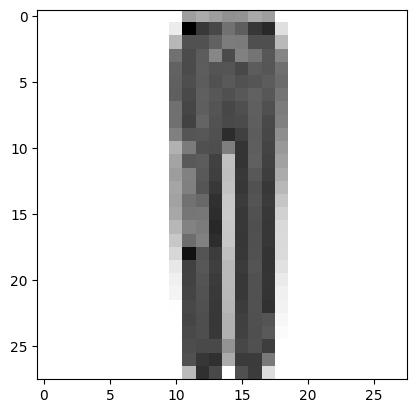

['hinh:', array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  97,  84,
         97, 110, 108,  87,  97,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  19, 255, 199,
        183, 142, 161, 200, 213,  32,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  72, 174, 173,
        158, 131, 132, 176, 176,  70,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 142, 180, 163,
        120, 180, 126, 139, 168, 122,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 156, 180, 162,
        171, 170, 183, 163, 169, 144,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 159, 177, 163,
        174, 166, 173, 170, 163, 148,   0,   0,   0,   0,   0,   0,   0,
          0,   0],


In [2]:
#in thử hình trong tập training (hình thứ 1000)
digit=x_train[1000]
plt.imshow(digit,cmap=plt.cm.binary)
plt.show()
print((['hinh:',x_train[1000]]))

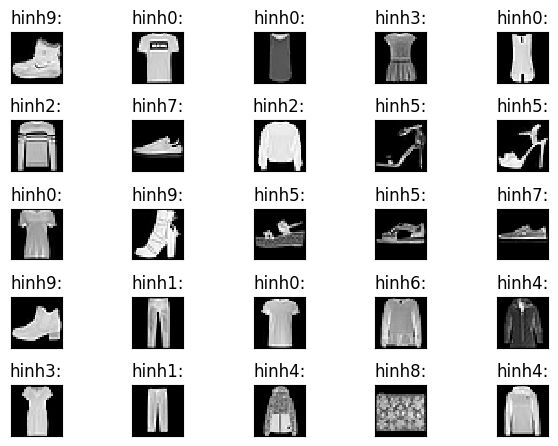

In [3]:
#tạo ra mảng hình taget random
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.tight_layout()
  plt.imshow(x_train[i],cmap='gray',interpolation='none')
  plt.title('hinh{}:'.format(y_train[i]))
  plt.xticks([])
  plt.yticks([])

In [4]:
#tạo mô hình
from keras.models import Sequential
from keras.layers import Dense
model = Sequential()
model.add(Dense(60000,activation='relu',input_shape=(28*28*1,)))
model.add(Dense(3000,activation='relu'))
model.add(Dense(1000,activation='relu'))
model.add(Dense(500,activation='relu'))
model.add(Dense(10,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 60000)             47100000  
                                                                 
 dense_1 (Dense)             (None, 3000)              180003000 
                                                                 
 dense_2 (Dense)             (None, 1000)              3001000   
                                                                 
 dense_3 (Dense)             (None, 500)               500500    
                                                                 
 dense_4 (Dense)             (None, 10)                5010      
                                                                 
Total params: 230,609,510
Trainable params: 230,609,510
Non-trainable params: 0
_________________________________________________________________


In [5]:
x_train=x_train.reshape(60000,28*28)
x_train=x_train.astype('float32')/255
X_test=x_test.reshape(10000,28*28)
x_test=x_test.astype('float32')/255

In [6]:
from keras.utils import to_categorical
y_train=to_categorical(y_train,10)
y_test=to_categorical(y_test,10)
y_test.shape

(10000, 10)

In [ ]:
model.compile(optimizer='rmsprop',loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(x_train,y_train,epochs=10,batch_size=128)
test_loss,test_acc=model.evaluate(x_test,y_test)
print('mất mát:',test_loss)
print('Độ chính xác:',test_acc)

Epoch 1/10
469/469 [==============================] - 4498s 10s/step - loss: 0.9130 - accuracy: 0.7117
Epoch 2/10
469/469 [==============================] - 4496s 10s/step - loss: 0.4309 - accuracy: 0.8408
Epoch 3/10
469/469 [==============================] - 4474s 10s/step - loss: 0.3752 - accuracy: 0.8614
Epoch 4/10
469/469 [==============================] - 4344s 9s/step - loss: 0.3415 - accuracy: 0.8735
Epoch 5/10
469/469 [==============================] - 4350s 9s/step - loss: 0.3181 - accuracy: 0.8816
Epoch 6/10
 24/469 [>.............................] - ETA: 1:08:03 - loss: 0.2985 - accuracy: 0.8796

In [ ]:
model.save('test2.h5')